**Dupla: José Renilson e Élisson Souza**

# **1º)**

**a) Implemente o Método de Jacobi e o Método de Gauss-Seidel e tente resolver os três sistemas usando os dois métodos.**

In [ ]:
import numpy as np

matriz_A = [[ 4,-1, 0,-1, 0, 0, 0],
            [-1, 4,-1, 0,-1, 0, 5],
            [ 0,-1, 4, 0, 0,-1, 0],
            [-1, 0, 0, 4,-1, 0, 6],
            [ 0,-1, 0,-1, 4,-1,-2],
            [ 0, 0,-1, 0,-1, 4, 6]]

matriz_B = [[ 2,-1, 1,-1],
            [ 2, 2, 2, 4],
            [-1,-1, 2,-5]]

matriz_C = [[ 4, 1,-1, 1,-2],
            [ 1, 4,-1,-1,-1],
            [-1,-1, 5, 1, 0],
            [ 1,-1, 1, 3, 1]]            

tol = 0.001
it_max = 12

Método de Jacobi:

In [ ]:
def jacobi(matriz, tol, it_max):
    n = np.shape(matriz)[0]
    x = np.zeros(n)
    x0 = np.zeros(n)
    k = 1
    while k <= it_max:
        for i in range(0,n):
            sum = 0
            for j in range(0,n):
                if j != i:
                    sum = sum + (matriz[i][j] * x0[j])
            x[i] = (1/matriz[i][i]) * (-sum + matriz[i][n])        
        if abs(x[n-1] - x0[n-1]) < tol:
            print(x)
            return       
        k = k+1
        for i in range(0,n):
            x0[i] = x[i]    
    print("Número máximo de iterações excedido")
    return

print("Para a Matriz A no método de Jacobi:")
jacobi(matriz_A, tol, it_max)

print("\nPara a Matriz B no método de Jacobi:")
jacobi(matriz_B, tol, it_max)

print("\nPara a Matriz C no método de Jacobi:")
jacobi(matriz_C, tol, it_max)

Para a Matriz A no método de Jacobi:
[0.99800557 1.9943589  0.99800557 1.99601114 0.99717945 1.99601114]

Para a Matriz B no método de Jacobi:
Número máximo de iterações excedido

Para a Matriz C no método de Jacobi:
[-0.75205599  0.04027028 -0.28025957  0.69008536]


Método de Gauss-Seidel:

In [ ]:
def gauss_seidel(matriz, tol, it_max):
    n = np.shape(matriz)[0]
    x0 = np.zeros(n)
    x = np.zeros(n)
    k = 1
    while k <= it_max:
        for i in range(0,n):
            sum1 = sum2 = 0
            for j in range(0,i):
                sum1 = sum1 + matriz[i][j] * x[j]
            for j in range(i+1,n):
                sum2 = sum2 + matriz[i][j] * x0[j]
            x[i] = (1/matriz[i][i]) * (-sum1 - sum2 + matriz[i][n])        
        if abs(x[n-1] - x0[n-1]) < tol:
            print(x)
            return
        k = k+1
        for i in range(0,n):
            x0[i] = x[i]    
    print("Número máximo de iterações excedido")
    return


print("Para a Matriz A no método de Gauss-Seidel:")
gauss_seidel(matriz_A, tol, it_max)

print("\nPara a Matriz B no método de Gauss-Seidel:")
gauss_seidel(matriz_B, tol, it_max)

print("\nPara a Matriz C no método de Gauss-Seidel:")
gauss_seidel(matriz_C, tol, it_max)

Para a Matriz A no método de Gauss-Seidel:
[0.99874463 1.99892847 0.99954269 1.99924232 0.99935327 1.99972399]

Para a Matriz B no método de Gauss-Seidel:
[ 0.99804688  2.00244141 -0.99975586]

Para a Matriz C no método de Gauss-Seidel:
[-0.75272556  0.04085543 -0.28049197  0.69135765]


**b) Implemente uma função que calcule o raio espectral, e use-a para explicar porque um dos sistemas acima não converge. Dica: Use a função 
scipy.linalg.eig da biblioteca SciPy para calcular autovalores.**

In [ ]:
print("Matriz A:")
A = np.delete(matriz_A,(np.shape(matriz_A)[0]), axis = 1)
autovalores,autovetores = np.linalg.eig(A)
print("Autovalores:\n" + str(autovalores))
print("Raio espectral:\n" + str(max(autovalores)))

print("\n\nMatriz B:")
A = np.delete(matriz_B,(np.shape(matriz_B)[0]), axis = 1)
autovalores,autovetores = np.linalg.eig(A)
print("Autovalores:\n" + str(autovalores))
print("Raio espectral:\n" + str(max(autovalores)))

print("\n\nMatriz C:")
A = np.delete(matriz_C,(np.shape(matriz_C)[0]), axis = 1)
autovalores,autovetores = np.linalg.eig(A)
print("Autovalores:\n" + str(autovalores))
print("Raio espectral:\n" + str(max(autovalores)))

print("O sistema B não converge, pois possui autovalores complexos.")

Matriz A:
Autovalores:
[1.58578644 6.41421356 3.         3.58578644 5.         4.41421356]
Raio espectral:
6.4142135623731


Matriz B:
Autovalores:
[2.+2.23606798j 2.-2.23606798j 2.+0.j        ]
Raio espectral:
(2.0000000000000004+0j)


Matriz C:
Autovalores:
[1.41126245 6.58873755 4.54629468 3.45370532]
Raio espectral:
6.5887375530780306
O sistema B não converge, pois possui autovalores complexos.


# **2º)**

**a) Aproveitando a função implementada na sexta questão da primeira
lista, implemente uma nova função que plote, além do gráfico de uma função y = f(x), um conjunto de pontos X ⊂ R² dado de entrada.**

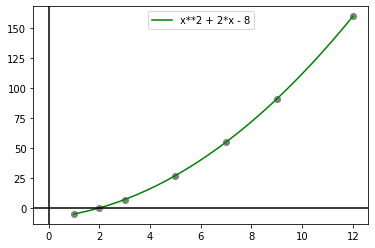

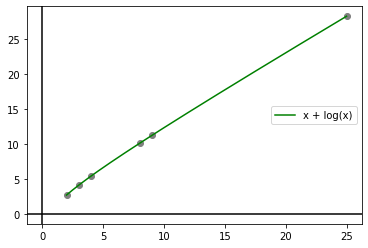

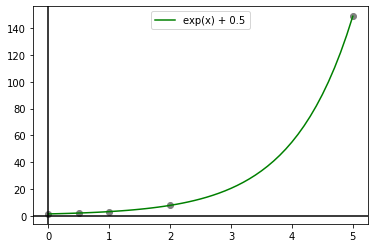

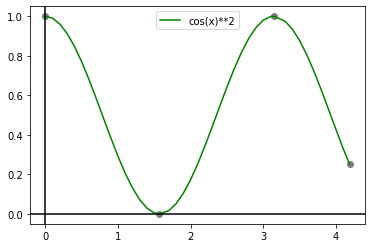

In [ ]:
import matplotlib.pyplot as plt
import sympy as s
import numpy as np
import copy as copy

def calculaFx(equacao, a):
    x = s.symbols("x")
    y = equacao.subs(x, a)
    return y

def grafico(X, equacao):
    X.sort()
    valoresx = []
    valoresy = []
    x1 = X[0]
    i = 0
    n = len(X)
    while i < n:
        if x1 >= X[i]:
            valoresx.append(X[i])
            y = calculaFx(equacao, X[i])
            valoresy.append(y)
            plt.scatter(X[i], calculaFx(equacao, X[i]), color='gray')
            i = i + 1
        else:
            valoresx.append(x1)
            y = calculaFx(equacao, x1)
            valoresy.append(y)
        x1 = x1 + 0.1
    plt.plot(valoresx, valoresy, color='green', label = equacao)
    plt.axvline(0, color='black')
    plt.axhline(0, color='black')
    plt.legend()                  
    plt.show()

x = s.symbols('x')
equacao = x**2 + 2*x - 8
X = [1, 2, 3, 5, 7, 9, 12]
grafico(X, equacao)

equacao = s.log(x) + x
X = [2, 8, 4, 25, 3, 9]
grafico(X, equacao)

equacao = s.E**x + 1/2
X = [0, 1, 2, 5, 1/2]
grafico(X, equacao)

equacao = s.cos(x)**2
X = [0, s.pi/2, s.pi, 4*s.pi/3]
grafico(X, equacao)

**b) Adapte a formulação do ajuste linear de mínimos quadrados a dados, de forma que a função ajustada seja um polinômio de grau n, onde são o dados como entrada um conjunto de pontos X ⊂ R² e o número inteiro n. Crie três exemplos, com graus n = 3, 5 e 6, considerando |X| > 2n em cada caso. Use a função implementada na letra a) para visualizar os resultados.**

F(x) é: -0.00211198763391663*x**3 + 0.0217157156908735*x**2 - 0.154321749340792*x + 0.246648043449874


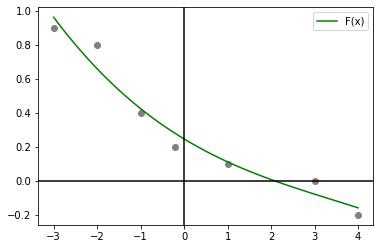

F(x) é: -3.33270379368767e-6*x**5 + 0.000227757770147773*x**4 - 0.00557424635083921*x**3 + 0.0559895621075061*x**2 - 0.0532038937880684*x + 7.38303226537271


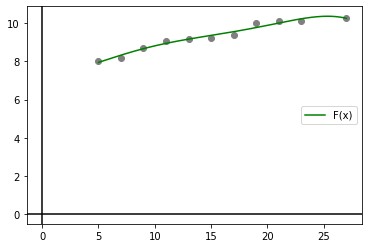

F(x) é: 3.80307723899203e-7*x**6 - 3.36000269895207e-5*x**5 + 0.00109746394862704*x**4 - 0.0156808843164045*x**3 + 0.0839216256503518*x**2 + 0.268704184262767*x + 0.607147802382793


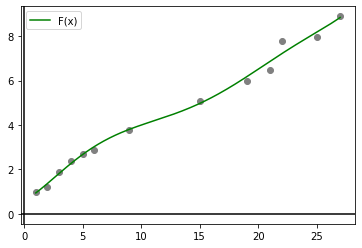

In [ ]:
def graficoSimples(xi, xf, equacao):
    valoresx = []
    valoresy = []
    while xi <= xf + 0.1:
        valoresx.append(xi)
        y = calculaFx(equacao, xi)
        valoresy.append(y)
        xi = xi + 0.1
    plt.plot(valoresx, valoresy, color='green', label = "F(x)")
    plt.axvline(0, color='black')
    plt.axhline(0, color='black')
    plt.legend()                  
    plt.show()

def montaEquacao(solX):
    x = s.symbols('x')
    tamanho = len(solX)
    equacao = 0
    for i in range(tamanho):
        equacao = equacao + solX[i]*x**i
    return equacao

def minimosQuadrados(n, X, Y):
    x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11 = s.symbols('x0 x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 x11')
    multiplicadores = [x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11]
    mult = []
    tamanhoEnt = len(X)
    M = np.zeros((n + 1, n + 1))
    Mx = np.zeros((n + 1, n + 1))
    y = np.zeros((n + 1))
    solX = []
    for i in range(n + 1):
        for j in range(tamanhoEnt):
            y[i] = y[i] + Y[j] * pow(X[j], i)
    for i in range(n + 1):
        mult.append(multiplicadores[i])
    for i in range(n + 1):
        k = i
        for j in range(n + 1):
            if i == 0 and j == 0:
                M[i, j] = tamanhoEnt
            else:
                 for z in range(tamanhoEnt):
                      M[i, j] = M[i, j] + pow(X[z], k)  
            k = k + 1
    determinanteM = np.linalg.det(M) 
    for p in range(n + 1):
        Mx = copy.deepcopy(M)
        for i in range(n + 1):
            Mx[i, p] = y[i]
        determinanteMx = np.linalg.det(Mx) 
        solX.append(determinanteMx/determinanteM)
    equacao = montaEquacao(solX)
    for i in range(tamanhoEnt):
        plt.scatter(X[i], Y[i], color='gray')
    print("F(x) é:", equacao)
    graficoSimples(min(X), max(X), equacao)

n = 3
X = [-3, -2, -1, -0.2, 1, 3, 4]
Y = [0.9, 0.8, 0.4, 0.2, 0.1, 0, -0.2]
minimosQuadrados(n, X, Y)

n = 5
X = [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 27]
Y = [8, 8.2, 8.7, 9.1, 9.2, 9.24, 9.38, 10, 10.1, 10.12, 10.28]
minimosQuadrados(n, X, Y)

n = 6
X = [1, 2, 3, 4, 5, 6, 9, 15, 19, 21, 22, 25, 27]
Y = [1, 1.2, 1.9, 2.4, 2.7, 2.9, 3.8, 5.1, 6, 6.5, 7.8, 7.98, 8.9]
minimosQuadrados(n, X, Y)

**c) Repita a mesma tarefa da questão anterior, com os mesmos exemplos, usando polinômios de Lagrange de grau n = |X| − 1.**

F(x) é: -0.00030411470143613*x**6 + 0.00219553099017385*x**5 - 0.00301799886621315*x**4 - 0.0219553099017385*x**3 + 0.0828544264928194*x**2 - 0.130240221088435*x + 0.17046768707483


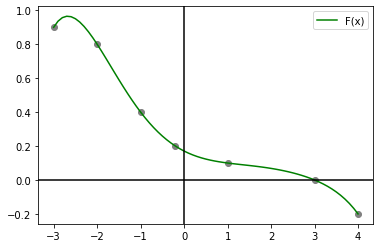

F(x) é: -7.87233148072993e-9*x**10 + 1.17392614137405e-6*x**9 - 7.6952187013831e-5*x**8 + 0.00291737595448538*x**7 - 0.0707656981805355*x**6 + 1.1462066925768*x**5 - 12.5363528379995*x**4 + 91.2587240914213*x**3 - 422.25692964109*x**2 + 1118.94215066609*x - 1278.66587486269


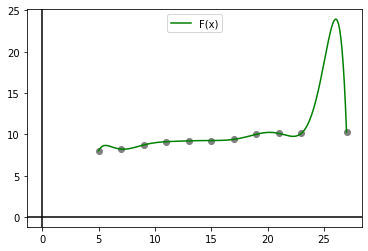

F(x) é: 1.60244513322204e-11*x**12 - 2.36748859918988e-9*x**11 + 1.53014012908183e-7*x**10 - 5.69761662519962e-6*x**9 + 0.000135622681160289*x**8 - 0.00216821675515974*x**7 + 0.0238594187580523*x**6 - 0.182579920719378*x**5 + 0.969144581249079*x**4 - 3.48344316794204*x**3 + 7.90578943762244*x**2 - 9.27006122186699*x + 5.03932901392686


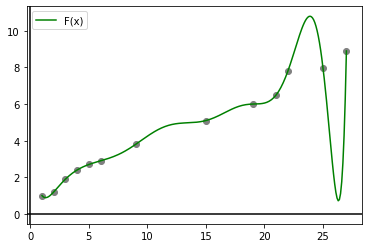

In [ ]:
def lagrange(X, Y):
    n = len(X)
    x = s.symbols('x')
    equacao = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L = L * (x - X[j])/(X[i] - X[j])
        equacao = equacao + Y[i] * L
    s.simplify(equacao)
    for i in range(n):
        plt.scatter(X[i], Y[i], color='gray')
    print("F(x) é:", s.simplify(equacao))
    graficoSimples(min(X), max(X), equacao) 


X = [-3, -2, -1, -0.2, 1, 3, 4]
Y = [0.9, 0.8, 0.4, 0.2, 0.1, 0, -0.2]
lagrange(X, Y)

X = [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 27]
Y = [8, 8.2, 8.7, 9.1, 9.2, 9.24, 9.38, 10, 10.1, 10.12, 10.28]
lagrange(X, Y)

X = [1, 2, 3, 4, 5, 6, 9, 15, 19, 21, 22, 25, 27]
Y = [1, 1.2, 1.9, 2.4, 2.7, 2.9, 3.8, 5.1, 6, 6.5, 7.8, 7.98, 8.9]
lagrange(X, Y)

**d) Aplique o Método de Neville para aproximar os valores de f(x) nos pontos médios entre cada par de abscissas consecutivas dadas de entrada. Exemplo: se X = {(1, 2),(2, −4),(4, 6)}, você deve aproximar f(1.5) e f(3).**

In [ ]:
import numpy as np

def pontosMedios(coordenadasX, coordenadasY):
    coordenadasMediasX = []
    coordenadasMediasY = []
    for i in range(len(coordenadasX) - 1):
        coordenadasMediasX.append((coordenadasX[i] + coordenadasX[i + 1]) / 2)
        coordenadasMediasY.append((coordenadasY[i] + coordenadasY[i + 1]) / 2)
    return coordenadasMediasX, coordenadasMediasY

def metodoNeville(coordenadasX, coordenadasY):
    n = len(coordenadasX)
    coordenadasMediasX, coordenadasMediasY = pontosMedios(coordenadasX, coordenadasY)
    Q = np.zeros((n, n))
    for k in range(n - 1):
        for i in range(n):
            Q[i, 0] = coordenadasY[i]
        x = coordenadasMediasX[k]
        for i in range(1, n):
            for j in range(1, i + 1):
                f = (x - coordenadasX[i - j]) * Q[i, j - 1]
                g = (x - coordenadasX[i]) * Q[i - 1, j - 1]
                h = coordenadasX[i] - coordenadasX[i - j]
                Q[i, j] = (f - g) / h
        print(f"\nA matriz de aproximação F(x) para o ponto médio {x} é:\n", Q)
        print(f"A aproximação em F({x}) é de: {Q[-1, -1]}")

print("Teste 1:")
coordenadasX = [1, 1.3, 1.6, 1.9, 2.2]
coordenadasy = [0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]
metodoNeville(coordenadasX, coordenadasy)
print("\n\nTeste 2:")
coordenadasX = [1, 2, 4]
coordenadasy = [2, -4, 6]
metodoNeville(coordenadasX, coordenadasy)

Teste 1:

A matriz de aproximação F(x) para o ponto médio 1.15 é:
 [[0.7651977  0.         0.         0.         0.        ]
 [0.620086   0.69264185 0.         0.         0.        ]
 [0.4554022  0.7024279  0.69508836 0.         0.        ]
 [0.2818186  0.7157776  0.69909048 0.69575538 0.        ]
 [0.1103623  0.71045935 0.71976629 0.69564451 0.69574152]]
A aproximação em F(1.15) é de: 0.695741521875

A matriz de aproximação F(x) para o ponto médio 1.4500000000000002 é:
 [[0.7651977  0.         0.         0.         0.        ]
 [0.620086   0.54753015 0.         0.         0.        ]
 [0.4554022  0.5377441  0.54019061 0.         0.        ]
 [0.2818186  0.542194   0.53885657 0.53952359 0.        ]
 [0.1103623  0.53900305 0.54299174 0.53954577 0.53953191]]
A aproximação em F(1.4500000000000002) é de: 0.539531909375

A matriz de aproximação F(x) para o ponto médio 1.75 é:
 [[0.7651977  0.         0.         0.         0.        ]
 [0.620086   0.40241845 0.         0.         0.        ]

# **3º)**

**a) Implemente uma função que receba o string com a expressão de f(x), um número real a, e retorne o valor de f(a). (Dica: em Python, você pode usar a biblioteca sympy com as funções sympify e subs.)**

In [ ]:
import sympy as s
import matplotlib.pyplot as plt

def calculaFx(equacao, a):
    x = s.symbols("x")
    func = s.sympify(equacao)
    y = func.subs(x, a)
    return y

equacoes = ["x**3 + x**2", "x**2 + 2/5", "x**5 + 3*x**4 + 7*x**2 + 3/7"]
valores = [1, 5, 3/5]
for equacao in equacoes:
    for a in valores:
        print(f"f({a}) =", equacao, "=", calculaFx(equacao, a))

f(1) = x**3 + x**2 = 2
f(5) = x**3 + x**2 = 150
f(0.6) = x**3 + x**2 = 0.576000000000000
f(1) = x**2 + 2/5 = 7/5
f(5) = x**2 + 2/5 = 127/5
f(0.6) = x**2 + 2/5 = 0.760000000000000
f(1) = x**5 + 3*x**4 + 7*x**2 + 3/7 = 80/7
f(5) = x**5 + 3*x**4 + 7*x**2 + 3/7 = 36228/7
f(0.6) = x**5 + 3*x**4 + 7*x**2 + 3/7 = 3.41513142857143


**b) Usando a função implementada na letra a), implemente um programa que receba um string com a expressão de uma função qualquer, um intervalo [a, b], e uma quantidade de amostras n, e plote seu gráfico. Ilustre seu funcionamento com 3 gráficos de funções distintas.**

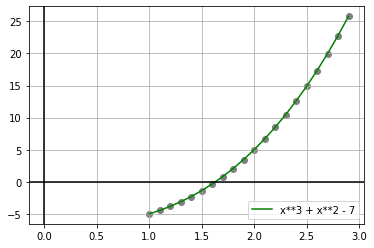

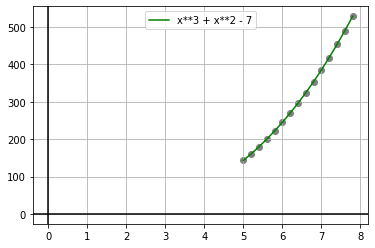

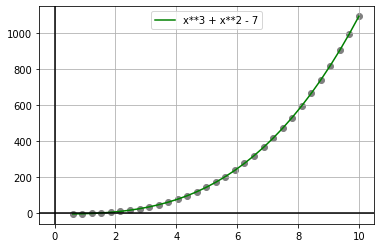

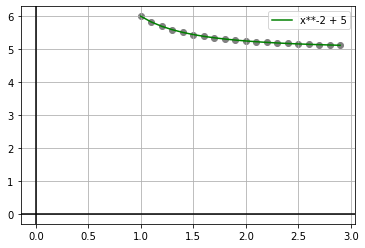

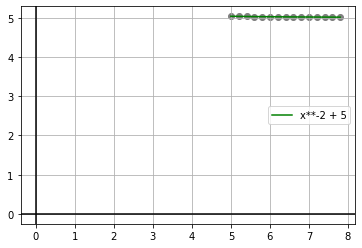

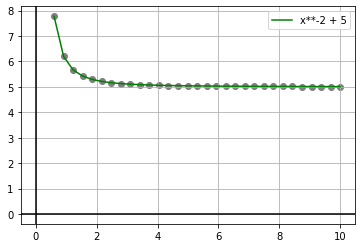

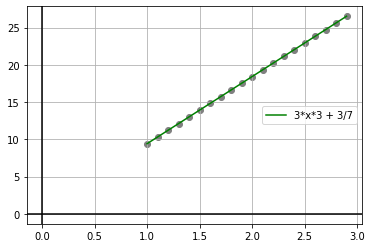

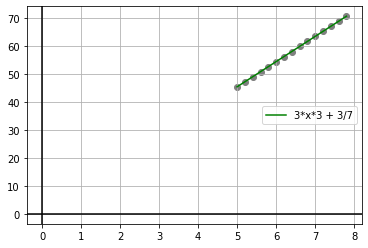

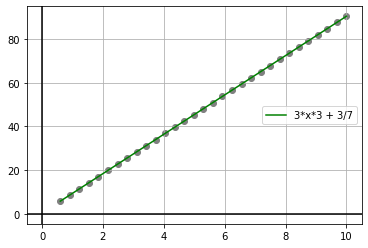

In [ ]:
def mostrarGrafico(valoresx, valoresy, equacao, pontos = None, string = None):
    if pontos != None:
        for i in pontos:
            if len(i) > 2:
                plt.scatter(i[0], i[1], color='red', label = "Ponto principal")
            else:
                plt.scatter(i[0], i[1], color='gray')
    if string == None:
        string = ""
    plt.plot(valoresx, valoresy, color='green', label = equacao + string)
    plt.axvline(0, color='black')
    plt.axhline(0, color='black')
    plt.legend()   
    plt.grid(True)               
    plt.show()

def calculaComIntervalo(equacao, a, b, amostras):
    pontos = []
    valoresx = []
    valoresy = []
    if b < a:
        aux = b
        b = a
        a = aux
    variacao = (b - a) / amostras
    while a < b:
        y = calculaFx(equacao, a)
        pontos.append((a, y))
        valoresx.append(a)
        valoresy.append(y)
        a = a + variacao
    mostrarGrafico(valoresx, valoresy, equacao, pontos)

equacoes = ["x**3 + x**2 - 7", "x**-2 + 5", "3*x*3 + 3/7"]
valoresI = [1, 5, 3/5]
valoresF = [3, 8, 10]
amostras = [20, 15, 30]
for equacao in equacoes:
    for a in range(len(valoresI)):
        calculaComIntervalo(equacao, valoresI[a], valoresF[a], amostras[a])

**c) Implemente uma função que aproxime a primeira e a segunda derivada em cada ponto da amostra de uma função dada como string, usando 3 pontos. Plote o grafico da primeira e da segunda derivada obtida dessa maneira junto com o gráfico da função (como implementado na letra b)). Ilustre seu funcionamento com 3 exemplos usando funções distintas.**

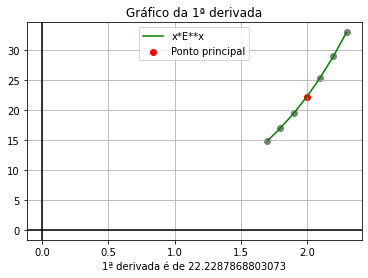

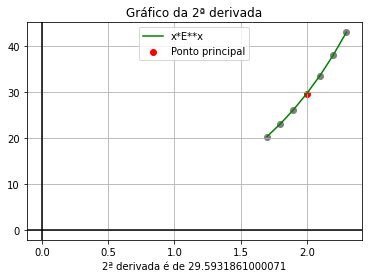

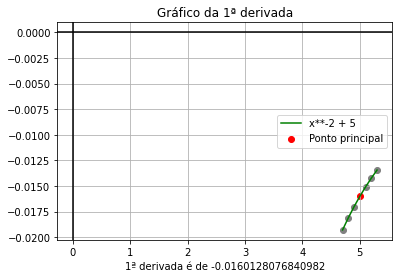

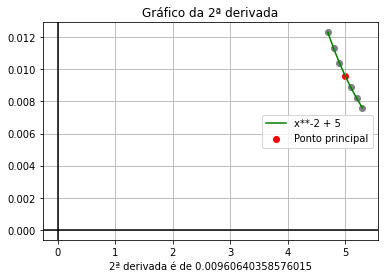

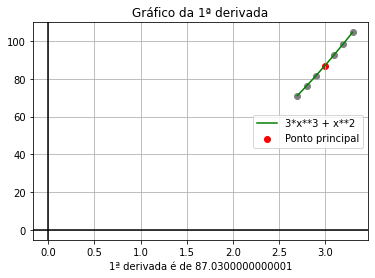

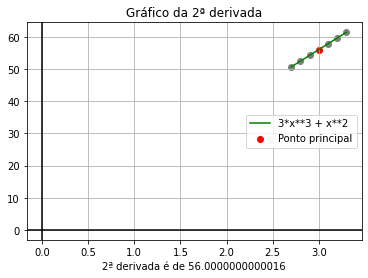

In [ ]:
def Derivadas(equacao, x):
    h = 0.1
    i = 7
    xant = x
    yant = 0
    yant2 = 0
    x = x - (i - 1)/2 * h
    pontos = []
    pontos2 = []
    valoresx = []
    valoresy = []
    valoresy2 = []
    while i > 0:
        f0 = calculaFx(equacao, x)
        f1 = calculaFx(equacao, x - h)
        f2 = calculaFx(equacao, x + h)
        fx = (1/(2*h)) * (f2 - f1)
        fx2 = (1/(h*h)) * (f1 - 2*f0 + f2)
        #f3 = calculaFx(equacao, x - 2*h)
        #f4 = calculaFx(equacao, x + 2*h)
        #fxp = (1/(2*h)) * (3*f0 - 4*f1 + f3)
        #fxa = (1/(2*h)) * (-3*f0 + 4*f2 - f4)
        if x >= xant - h/10 and yant == 0:
            pontos.append((x, fx, 1))
            pontos2.append((x, fx2, 1))
            yant = fx
            yant2 = fx2
        else:
            pontos.append((x, fx))
            pontos2.append((x, fx2))
        valoresx.append(x)
        valoresy.append(fx)
        valoresy2.append(fx2)
        i = i - 1
        x = x + h
    plt.title("Gráfico da 1ª derivada")
    aux = s.simplify(yant).n()
    plt.xlabel(xlabel = "1ª derivada é de " + str(aux))
    mostrarGrafico(valoresx, valoresy, equacao, pontos)
    plt.title("Gráfico da 2ª derivada")
    aux = s.simplify(yant2).n()
    plt.xlabel(xlabel = "2ª derivada é de " + str(aux))
    mostrarGrafico(valoresx, valoresy2, equacao, pontos2)

equacoes = ["x*E**x", "x**-2 + 5", "3*x**3 + x**2"]
valoresX = [2, 5, 3]
for a in range(len(valoresX)):
    Derivadas(equacoes[a], valoresX[a])


**d) Implemente uma função que calcule a integral definida usando a amostra de uma função dada como string, e seu intervalo de integração [a, b]. Com este objetivo, use a regra de Simpson composta, especificando a quantidade de subintervalos n como parâmetro de entrada. Ilustre seu funcionamento com 3 gráficos de funções distintas, e 3 valores de n distintos em cada caso.**

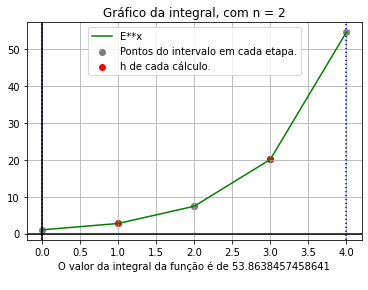

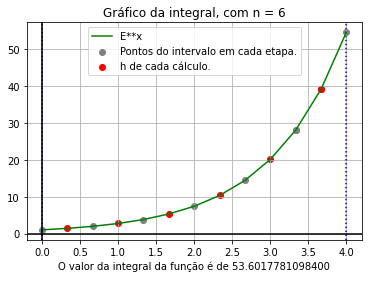

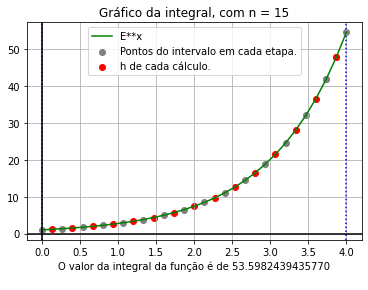

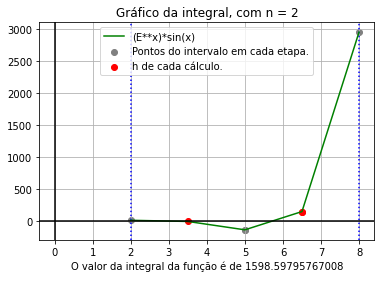

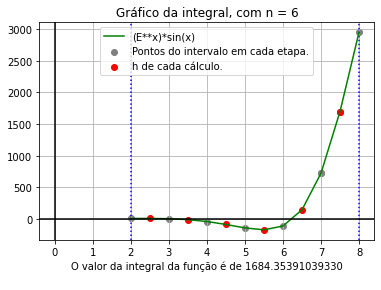

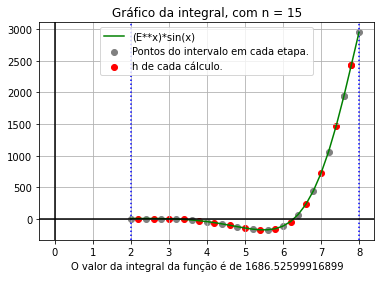

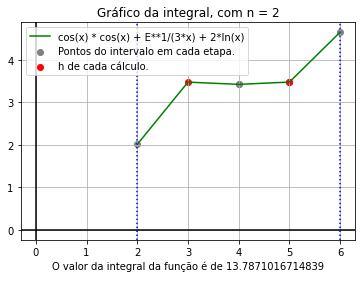

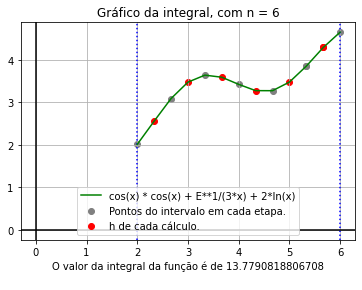

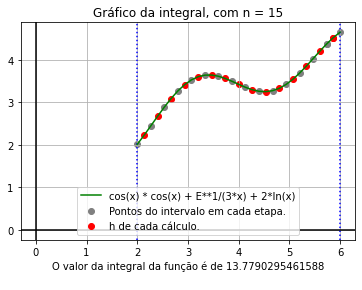

In [ ]:
def integralDefinida(equacao, a, b, n):
    if a > b:
        aux = a
        a = b
        b = aux
    if n == 0:
        n = 1
    fxf = 0
    x0 = 0
    x2 = a
    divisoes = n
    contribuicao = (b - a) / n
    valoresx = []
    valoresy = []
    plt.axvline(a, color = 'b', ls = ':')
    plt.axvline(b, color = 'b', ls = ':')
    while divisoes > 0:
        x0 = x2
        x2 = x2 + contribuicao
        h = (x2 - x0) / 2
        x1 = x0 + h
        f0 = calculaFx(equacao, x0)
        f1 = calculaFx(equacao, x1)
        f2 = calculaFx(equacao, x2)
        fxf = fxf + (h/3) * (f0 + 4 * f1 + f2)
        valoresx.append(x0)
        valoresx.append(x1)
        valoresy.append(f0)
        valoresy.append(f1)
        plt.scatter(x0, f0, color='gray')
        plt.scatter(x1, f1, color='red')
        divisoes = divisoes - 1
    valoresx.append(x2)
    valoresy.append(f2)
    plt.scatter(x0, f0, color='gray', label = "Pontos do intervalo em cada etapa.")
    plt.scatter(x1, f1, color='red', label = "h de cada cálculo.")
    plt.scatter(x2, f2, color='gray')
    x = s.simplify(fxf).n()
    plt.title("Gráfico da integral, com n = " + str(n))
    plt.xlabel(xlabel = "O valor da integral da função é de " + str(x) + "\n")
    mostrarGrafico(valoresx, valoresy, equacao)

equacoes = ["E**x", "(E**x)*sin(x)", "cos(x) * cos(x) + E**1/(3*x) + 2*ln(x)"]
intervalos = [[0, 4], [2, 8], [2, 6]]
valoresN = [2, 6, 15]
for i in range(len(equacoes)):
    for j in range(len(valoresN)):
        integralDefinida(equacoes[i], intervalos[i][0], intervalos[i][1], valoresN[j])